# Making figures in Python

## Matplotlib

To create basic data visualizations in Python, we can use the `matplotlib` library, specifically a set of functions in a module called `pyplot`. 

### Plotting from a data frame
Before we can plot, we need to read in our data.

In [1]:
data_dir = "/Users/fordfishman/GitHub/envs110/python/data/"

csv = data_dir + "boston_precip_temp.csv"



First, let's make a histogram showing the overall distribution of a column. We'll use the `precip-total` columns. 

To do this, we initialize a blank figure and set of axes with `plt.subplots()`. 

We then directly add the histogram to the axes with `ax.hist()`, being sure to specify the column you want to plot. 

Finally, we can display the figure with `plt.show()`.

Histograms show the distribution of our data. You can see that precipitation is centered around 4.0 in. The y-axis counts the number of samples that fall within bins, for instance, between 3.75 and 4.25 there are about 65 samples. There are very few samples with less precipitation than 3.0 in. 

We also have many customization options. For the histogram itself, we can specify the number of bins, the color of the bins, and color of the bin edges within `hist()`.

We can also specify axis labels with `ax.set_xlabel()` and `ax.set_ylabel()`. The plot title is set with `ax.set_title()`.



In [3]:
figure, ax = plt.subplots()
ax.hist(df['precip-total']) # specify bins, color, and edge color
plt.show()

There are many more axis and plot customizations you can do. Be sure check out [the `matplotlib` documentation](https://matplotlib.org/).

### Scatter plot
Scatter plots show us the relationships between two different variables in our data, with one on each axis.

In [4]:
figure, ax = plt.subplots()

plt.show()

### Line Plot

Line plots are another simple visualization we can make through `matplotlib`. Th

Let's a plot of temperature in Natick over the course of the year. First, we need to subset the data frame to only include data from Natick.

Then, we make a plot just as we did before, but instead of using `ax.hist()`, we use `ax.plot(x, y)`, putting the year first to specify the x axis, followed by temperature for the y. 

In [6]:
# subset data
df_nat = df.loc[ df['name']=='NATICK, MA US', :]
# create plot
figure, ax = plt.subplots()

plt.show()

You can put two lines from separate data sources on the same plot, as well, just by calling `axis.plot()` again, making sure to specify a different color and label. Calling `ax.legend()` will auto-generate a legend.

In [9]:
df_jp = df.loc[ df['name']=='JAMAICA PLAIN, MA US', :]
figure, ax = plt.subplots()
# draw two lines, with different colors and different labels
ax.plot(df_nat['date'], df_nat['temp'], color='#333') 

ax.set_xlabel('Month')
ax.set_ylabel('Temp (def F')
ax.set_title('Average monthly temp in Natick and Jamaica Plain')
ax.legend() # add legend
plt.show()

### Question
Using the `gapminder.csv` data set, create two subsets from the data frame for the countries Jamaica and Haiti. (Countries are in the "country" column.)

Make a line plot of life expectancy over time for the two countries, with each country having their own line. Make sure to label the axes, and to add a legend.

Life expectancy is in the "life_expectancy" column.

In [ ]:
### your code here:

### Multipanel Plots

You can also subdivide a figure into multiple panels with `plt.subplots(x,y)`, with x being the number of rows, and y being the numbers of columns. This creates an axes object with multiple indexes.

First, let's do a simple vertical column with 2 panels with `plt.subplots(2,1)`. To make the different plots, you specify where with `ax[i]`.

In [10]:

# create plot with multiple panels

To make labels and titles for the panels, you also need to specify `ax[i]` for each label. Thankfully, we can use `plt.subplots(sharex=True, sharey=True)` to minimize the number of labels. This also makes the axes of the different panels have the same ranges. Make sure your panels use the same units, however.

In [11]:
# create plot
figure, ax = plt.subplots(2,1) # rows by columns
ax[0].plot(df_nat['date'], df_nat['precip-total'])
ax[1].plot(df_jp['date'], df_jp['precip-total'])

plt.show()

If subplots become too squished, you can also change the figure size with `plt.subplots(figsize=(x,y))`.

In [12]:
figure, ax = plt.subplots(2,1, sharex=True, sharey=True) # rows by columns
ax[0].plot(df_nat['date'], df_nat['precip-total'])
ax[1].plot(df_jp['date'], df_jp['precip-total'])
ax[1].set_xlabel('Month')
ax[0].set_ylabel('Precipitation (in)')
ax[1].set_ylabel('Precipitation (in)')
ax[0].set_title('Natick')
ax[1].set_title('Jamaica Plain')
plt.show()

If we want to use multiple rows and columns, we now gain another index (`ax[i,j]`). 

In [13]:
df_nor = df.loc[ df['name']=='NORTON, MA US', :]
df_mil = df.loc[ df['name']=='MILFORD, MA US', :]

figure, ax = plt.subplots( , , sharex=True, sharey=True, figsize=(8,8)) # rows by columns
ax[  ].plot(df_nat['date'], df_nat['precip-total'])
ax[  ].set_title('Natick')
ax[  ].plot(df_jp['date'], df_jp['precip-total'])
ax[  ].set_title('Jamaica Plain')
ax[  ].plot(df_nor['date'], df_nor['precip-total'])
ax[  ].set_title('Norton')
ax[  ].plot(df_mil['date'], df_mil['precip-total'])
ax[  ].set_title('Milford')
plt.show()

When the number of panels, the amount of code duplication can get a little out of hand. Here, we use a nested `for` loop and nested list to reduce the amount of code needed for a 3 x 3 figure. 

We generate a blank multipanel figure before the loops. We then make one row at a time, going left to right, making a new subset for each panel.

In [15]:
# how many rows and columns?
nrow = 3
ncol = 3

# draw axes
figure, ax = plt.subplots( , , sharex=True, sharey=True, figsize=(10,10)) 

# list of lists of countries -> 3x3
stations = [
    ['NATICK, MA US', 'MILFORD, MA US', 'JAMAICA PLAIN, MA US'], 
    ['NORTON, MA US', 'BRIDGEWATER, MA US', 'READING, MA US'], 
    ['FRANKLIN, MA US','MAYNARD, MA US', 'LOWELL, MA US']
]

        

plt.show()

## Using functions to repeat figures

We talked about using functions to reduce code duplication. This can very useful when producing the same figure multiple times.

In [12]:
def visualize(filename):

    data = pd.read_csv(filename,header=None) # read in file

    fig, ax = plt.subplots(1, 3, figsize=(10.0, 3.0)) # make blank plot

    ax[0].plot(data.mean())
    ax[0].set_ylabel('average')

    ax[1].plot(data.max())
    ax[1].set_ylabel('max')

    ax[2].plot(data.min())
    ax[2].set_ylabel('min')

    fig.tight_layout()
    plt.show()

Rather than jumbling this code together in one giant for loop, we can now read and reuse with a simple for loop:

https://raw.githubusercontent.com/DeisData/python/master/data/inflammation-01.csv


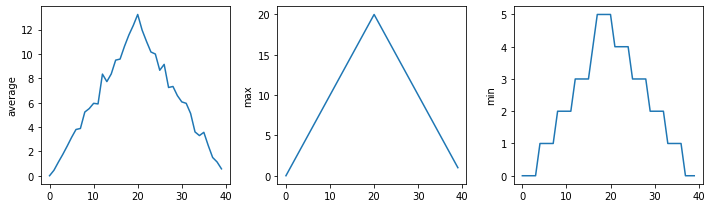

https://raw.githubusercontent.com/DeisData/python/master/data/inflammation-02.csv


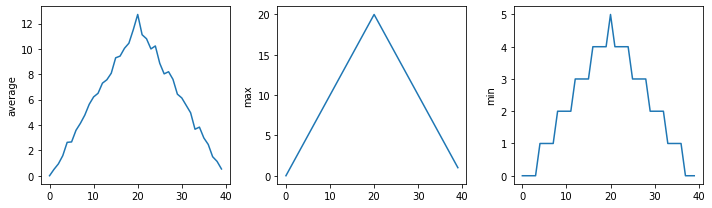

https://raw.githubusercontent.com/DeisData/python/master/data/inflammation-03.csv


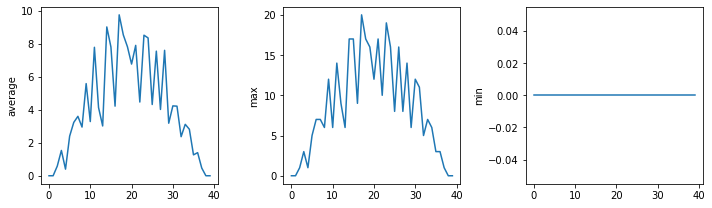

In [13]:
partial_url = "https://raw.githubusercontent.com/DeisData/python/master/data/inflammation-0" # the part of the link all of the csv's share

filenames = [ partial_url + str(i) + ".csv" for i in range(1,4) ] # generates .../inflammation-01.csv through .../inflammation-04.csv

for filename in filenames:
    print(filename)
    visualize(filename)

## Seaborn

Seaborn is another plotting library in Python. It has many different figure themes and color palettes built in to make great visualizations out of the box. It has its own syntax and functions, but it also has compatibility with Matplotlib, if you would like to use the same functions but with Seaborn aesthetics.

Seaborn allows you to set a theme that will be used for subsequently created figures. We will use the default theme with `sns.set_theme()`.

In [38]:
# Apply the default theme


For info on setting themes and palettes, see the [Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html).

We can make a stacked histogram with `sns.histplot()`. We specify the data source as `df` with `data=df`. Once we do this, we can specify that the x-values will be from the `precip-total` column, and the colors of the stacks will be from `region`.

We make scatter plots like we did in matplotlib, but also add colors for grouping, like the histogram. 

Seaborn also fully integrates with Matplotlib. Once you use a Seaborn theme, Matplotlib will also use that theme.

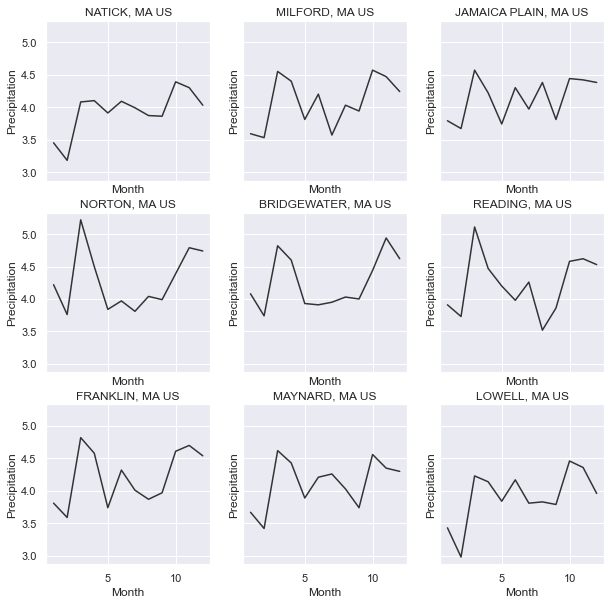

In [27]:
## same code as above for 3x3 plot

nrow = 3
ncol = 3

# draw axes
figure, ax = plt.subplots(nrow,ncol, sharex=True, sharey=True, figsize=(10,10)) 

# list of lists of countries -> 3x3
stations = [
    ['NATICK, MA US', 'MILFORD, MA US', 'JAMAICA PLAIN, MA US'], 
    ['NORTON, MA US', 'BRIDGEWATER, MA US', 'READING, MA US'], 
    ['FRANKLIN, MA US','MAYNARD, MA US', 'LOWELL, MA US']
]

for i in range(nrow): # i goes from 0 - 2
    
    for j in range(ncol): # j goes from 0 - 2
        
        station = stations[i][j]
        df_sub = df.loc[ df['name']==station, :]
        
        ax[i,j].plot(df_sub['date'], df_sub['precip-total'], color='#333') 
        ax[i,j].set_xlabel('Month')
        ax[i,j].set_ylabel('Precipitation')
        ax[i,j].set_title(station) # make sure to give each a title

plt.show()

#### Question

Plot histograms of `population` for each region in the year 2000 in the `gapminder.csv` data set. You can do this in one or multiple panels.

*Hint*: To make the histogram look a little better, you can import `numpy.log10` to transform `population`.

In [ ]:
### your code here:


## Boxplot

Boxplots are another type of figure often used to display differences between group means. They are sometimes called box and whisker plots.

The middle line in the box represents the median of each group.

The top and the bottom of the box represent 75th and 25th percentiles, respectively. 

The edges of the "whiskers" represent the full range of the group. 

Sometimes, there are points outside of the whiskers. These are points that are determined to be outliers. 

In [17]:
df_summer = df.loc[(df['date']==6) | (df['date']==7) | (df['date']==8), :]



### Question

Pick out the type of plot that goes with each scenario.

- Showing change over time
- Comparing group means
- Showing the distribution of your data
- Seeing if there is a relationship between two numerical variables

## Resources

You can make virtually any plot and customization you can think of in Python. Some searching online will go a long way in showing how to do construct your dream figure. 

- [More on Matplotlib](https://matplotlib.org/)
- [More on Seaborn](https://seaborn.pydata.org/index.html)
- [Python Graph Gallery](https://www.python-graph-gallery.com/)